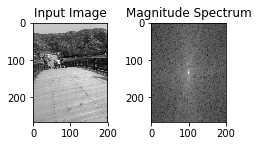

In [143]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image2.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))


f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure()

fig1 = plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
fig2 = plt.subplot(2,3,2)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')


plt.show()




In [153]:
import cv2
import math

class mouseParam:
    def __init__(self, input_img_name):
        #マウス入力用のパラメータ
        self.mouseEvent = {"x":None, "y":None, "event":None, "flags":None}
        #マウス入力の設定
        cv2.setMouseCallback(input_img_name, self.__CallBackFunc, None)
        
    

    #コールバック関数
    def __CallBackFunc(self, eventType, x, y, flags, userdata):

        self.mouseEvent["x"] = x
        self.mouseEvent["y"] = y
        self.mouseEvent["event"] = eventType
        self.mouseEvent["flags"] = flags

    #マウス入力用のパラメータを返すための関数
    def getData(self):
        return self.mouseEvent

    #マウスイベントを返す関数
    def getEvent(self):
        return self.mouseEvent["event"]

    #マウスフラグを返す関数
    def getFlags(self):
        return self.mouseEvent["flags"]

    #xとyの座標を返す関数
    def getPos(self):
        return (self.mouseEvent["x"], self.mouseEvent["y"])
    
    def sin(self,t):
        sin = np.zeros(img.shape)
        x = t[0]
        y = t[1]
        sin[y,x] = 1
        sincurve = 10*fshift*sin
        sincurve = np.fft.fftshift(sincurve)
        sincurve = np.fft.ifft2(sincurve)
        sincurve = np.uint8(sincurve.real)
        cv2.imshow('sincurve', sincurve)
        
    def ifft(self,p):
        ifft = np.zeros(img.shape)
        for i in range(len(p)):
            px = p[i][0]
            py = p[i][1]
            ifft[py:py+5,px:px+5] = 1
        i_back = fshift*ifft
        i_back = np.fft.ifftshift(i_back)
        i_back = np.fft.ifft2(i_back)
        i_back = np.abs(i_back)
        i_back = np.uint8(i_back.real)
        cv2.imshow('image_after_ifft', i_back)
        

cv2.namedWindow("image_after_ifft")
cv2.namedWindow("mouse_carsol")
cv2.namedWindow("sincurve")

click_points = []
draw = False
    
while True:
    blank = np.zeros((img.shape))
 
    
    # 描画する
    [cv2.circle(blank, point, 3, (255,255,255), thickness=-1, lineType=cv2.LINE_8, shift=0) for point in click_points]
    cv2.imshow('mouse_carsol', blank)


    

    # 描画結果の中でマウスの状態を取得する
    mouseData = mouseParam('mouse_carsol')
    
    
    k = cv2.waitKey(1)
    if k == 27:
        break

    #左クリックがあったら表示
    if mouseData.getEvent() == cv2.EVENT_LBUTTONDOWN: # 左ボタンを押下したとき
        draw = True
        click_points.append(mouseData.getPos())
        mouseData.sin(click_points[-1])
        mouseData.ifft(click_points)
    
    if mouseData.getEvent() == cv2.EVENT_LBUTTONUP: # 左ボタンを上げたとき
        draw = False


    if mouseData.getEvent() == cv2.EVENT_MOUSEMOVE and draw: # マウスが動いた時
        print(mouseData.getPos())
        if draw:
            click_points.append(mouseData.getPos())
            mouseData.sin(click_points[-1])
            mouseData.ifft(click_points)



plt.close()
cv2.destroyAllWindows()